# Web Scraping and Introductory Data Analysis
FatemeZahra Broumandnia - 810100094
Marzie Hariri

# Goal
This project is around expriencing web scraping and perform an introductory data analysis.Also, this project aimed to explore techniques for analyzing and visualizing data. We investigated sampling methods like stratified sampling and random sampling to select representative subsets from a population. We then explored descriptive statistics and used tools like boxplots and normal distributions to understand the data characteristics. By working with you, We gained practical experience in data manipulation, visualization, and interpreting population and sample statistics, all of which are crucial skills for data analysis, on a basis for transactions of mostly Etherium.

In [3]:
!pip install beautifulsoup4
!pip install selenium
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [5]:
pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [7]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from tqdm import tqdm
import time
from bs4 import BeautifulSoup
import pandas as pd

In [8]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

In [9]:
driver.get('https://etherscan.io/txs')

## Data Gathering
This function named fetchData retrieves data from etherscan and converts it into a pandas DataFrame. 
 A loop iterates through page numbers from 1 to 2000 using tqdm ( a progress bar library).
dataTable = soup.find('table'): This line finds the first <table> element (assuming We have just one table).Then extracts the text content from all <th> elements within the <thead> (header) section of the table. It removes leading/trailing whitespaces using strip() and stores the list of headers in headerNames. This part only runs on the first iteration (num==1) to capture the header names. iterates through all <tr> elements (table rows) within the <tbody> (body) section of the table.
data.append([td.text.strip() for td in row.find_all('td') if not td.has_attr('style') or 'display:none !important;' not in td['style']]): This line processes each row:
It extracts text content from all < td > elements (table data cells) within the current row.
The if condition ensures only cells without a style attribute or those where the style doesn't include display:none !important; (hidden elements) are considered. This helps avoid including potentially irrelevant content.
The extracted cell values (stripped of whitespaces) are appended as a list to the data list. After processing all pages, driver.quit() closes the Chrome webdriver instance.

In [28]:
def fetchData():
    data = []
    driver = webdriver.Chrome()
    for num in tqdm(range(1,2001)):
        driver.get("https://etherscan.io/txs?p={num}")
        webPage = driver.page_source   
        soup = BeautifulSoup(webPage, "html.parser")     
        dataTable = soup.find('table')
        if num==1:
            headerNames = [th.text.strip() for th in dataTable.find('thead').find_all('th')]
            print(headerNames)     
             
        for row in dataTable.find('tbody').find_all('tr') :       
            data.append([td.text.strip() for td in row.find_all('td') if not td.has_attr('style') or 'display:none !important;' not in td['style']])     
    driver.quit()        
    return data,headerNames  
        
data,headersName = fetchData()  
df = pd.DataFrame(data, columns=headersName)


Error sending stats to Plausible: error sending request for url (https://plausible.io/api/event): error trying to connect: tls handshake eof
  0%|                                                                               | 1/2000 [00:11<6:31:52, 11.76s/it]

['', 'Txn Hash', 'Method', 'Block', 'Age', 'From', '', 'To', 'Value', 'Txn Fee']


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [53:57<00:00,  1.62s/it]


In [130]:
df = pd.DataFrame(data, columns=headersName)

## Data Cleaning
In this part, we extracts the numeric value from a string containing currency. We try to Match digits and decimals at the beginning and ommit anything else, like the currency string at the end of the value. and also we handle cases where no number is found, and possibly removing rows with missing values (None)

In [131]:
import re

def extract_numeric_value(text):
  match = re.search(r"^([0-9.]+)", text)  
  if match:
    return float(match.group(1))
  else:
    return None  

df['Value'] = df['Value'].apply(extract_numeric_value)

# Handle missing values (if any)
df.dropna(subset=['Value'], inplace=True)  

value_column = df['Value']


we now calculate descriptive statistics and then display the descriptive statistics.

as it appears, The large number of zero-valued transactions significantly influences the median and potentially skews the mean towards the lower end. It's important to understand the context behind these zeros. 

Mean (0.329): This represents the average transaction value across the entire population. It's a good indicator of the overall central tendency, but can be skewed by outliers.
Median (0.0): This indicates that half of the transactions have a value less than or equal to 0, and the other half have a value greater than or equal to 0. This suggests a possible asymmetry in the distribution, with a larger number of transactions concentrated towards lower values.
Standard Deviation (3.64): This signifies a high degree of spread in the transaction values. A standard deviation this large relative to the mean (0.329) suggests that many transactions deviate from the average value.

In [109]:
mean_value = value_column.mean()
median_value = value_column.median()
mode_value = value_column.mode().iloc[0]
std_value = value_column.std()
min_value = value_column.min()
max_value = value_column.max()


print("Mean value:", mean_value)
print("Median value:", median_value)
print("Mode value:", mode_value)
print("Standard deviation value:", std_value)
print("Minimum value:", min_value)
print("Maximum value:", max_value)

Mean value: 0.32944276469946004
Median value: 0.0
Mode value: 0.0
Standard deviation value: 3.640530701494924
Minimum value: 0.0
Maximum value: 276.1


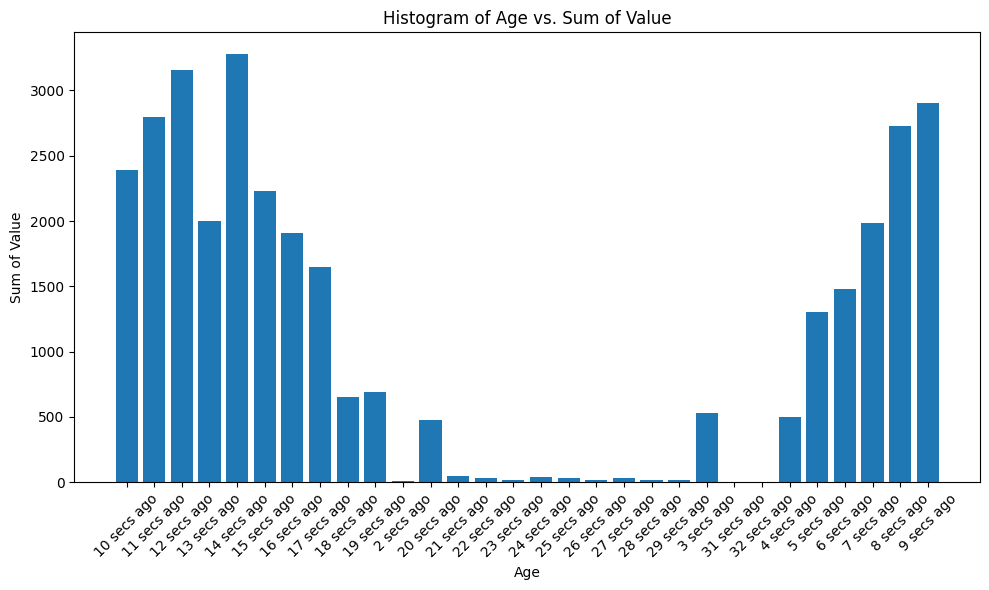

In [36]:
import matplotlib.pyplot as plt
age_groups = df.groupby('Age')['Value'].sum()  # Group by 'Age' and sum 'Value'

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(age_groups.index, age_groups.values)
plt.xlabel('Age')
plt.ylabel('Sum of Value')
plt.title('Histogram of Age vs. Sum of Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Drawing Histogram of Transaction values.

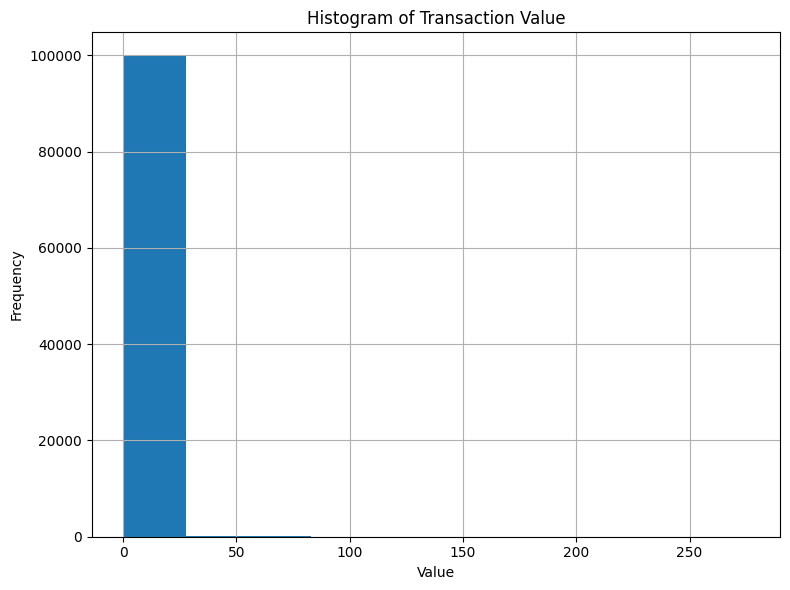

In [37]:
plt.figure(figsize=(8, 6))  
plt.hist(df['Value'])  
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Transaction Value')
plt.grid(True) 
plt.tight_layout()
plt.show()

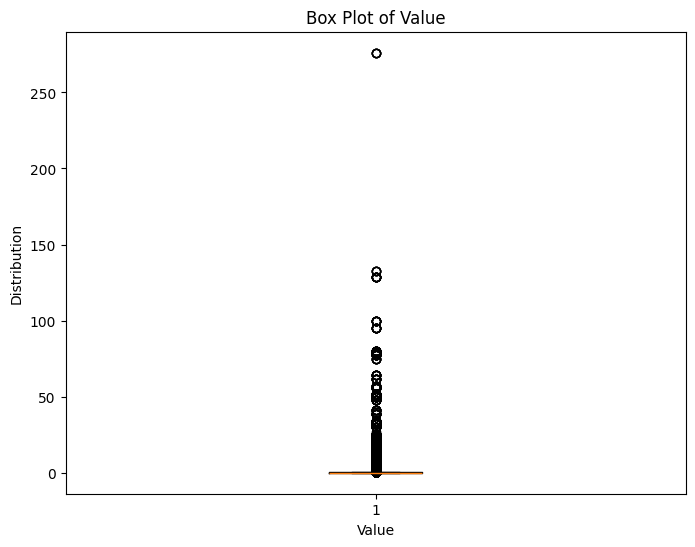

In [43]:
filtered_df = df.copy()  

plt.figure(figsize=(8, 6))
plt.boxplot(df_filtered['Value'])
plt.xlabel('Value')
plt.ylabel('Distribution')
plt.title('Box Plot of Value')
plt.show()

Now we try again with ommiting the 0.0 values that are in our dataframe. So we filter out rows with Value of 0.0 (consider using a tolerance for near-zero values)

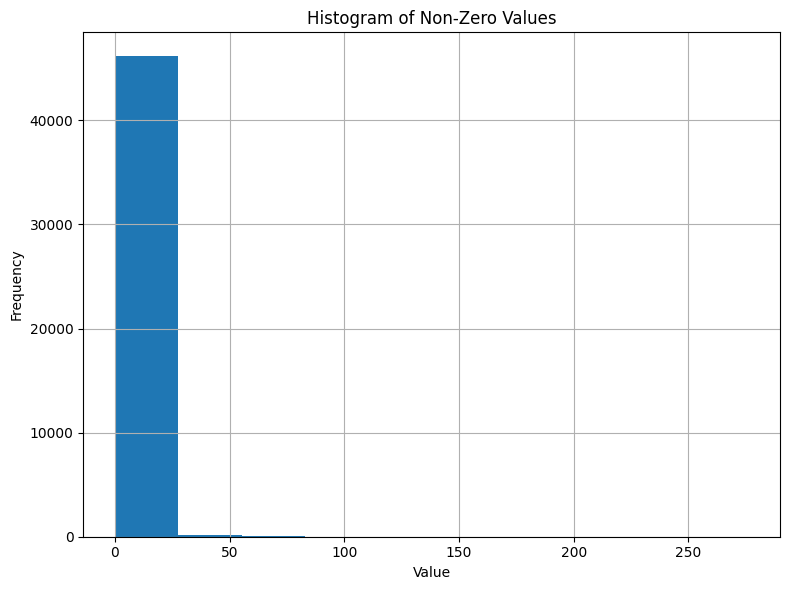

In [113]:
df_filtered = df.copy()  
df_filtered = df_filtered[df_filtered['Value'] != 0.0]

plt.figure(figsize=(8, 6))  
plt.hist(df_filtered['Value'])  
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Non-Zero Values')
plt.grid(True)  
plt.tight_layout()
plt.show()

Now with above 5 transactions. as it appears, it looks like a normal distibution That is heavily right skewed

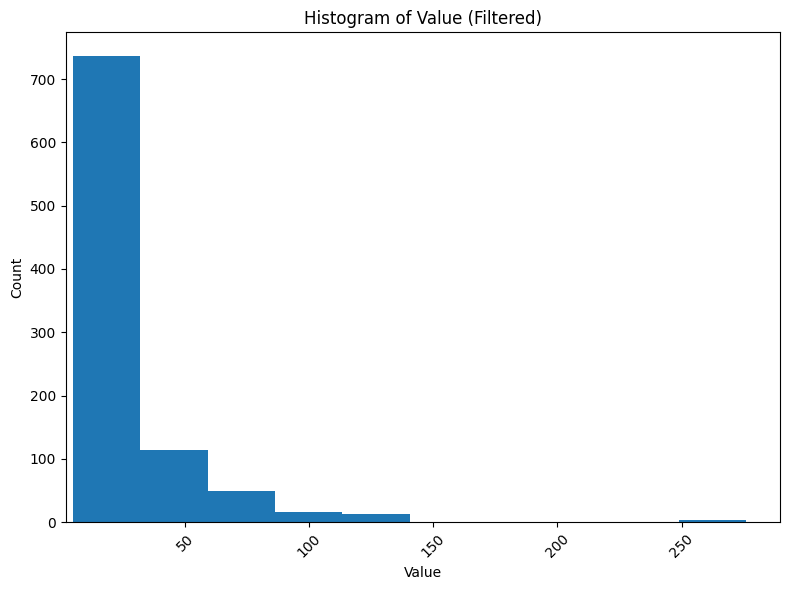

In [114]:
filtered_df = df.copy()
filtered_df = filtered_df[filtered_df['Value'] > 5.0]

# Create the histogram
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.hist(filtered_df['Value'])
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Histogram of Value (Filtered)')
plt.xlim(left=2.0)  
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

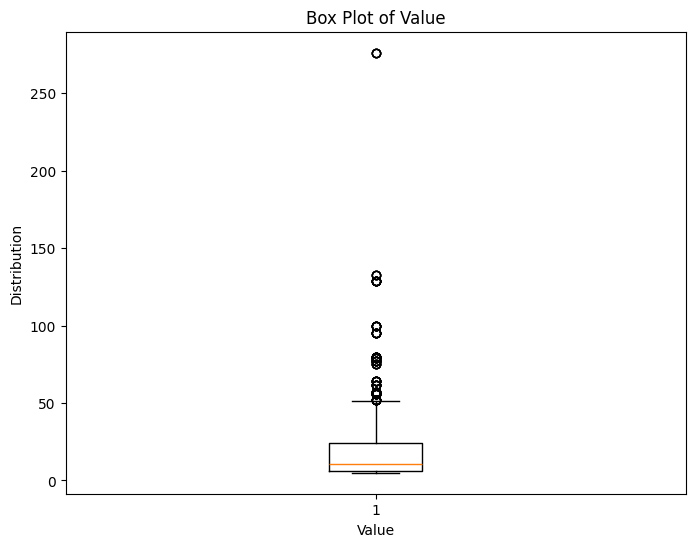

In [94]:
# Create a copy to avoid modifying the original df
filtered_df = df.copy()

# Filter for values under 5 (optional, comment out if not needed)
filtered_df = filtered_df[filtered_df['Value'] >= 5]

# Create the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_df['Value'])
plt.xlabel('Value')
plt.ylabel('Distribution')
plt.title('Box Plot of Value')
plt.show()


Try again to see values between 0.2 and 5.0

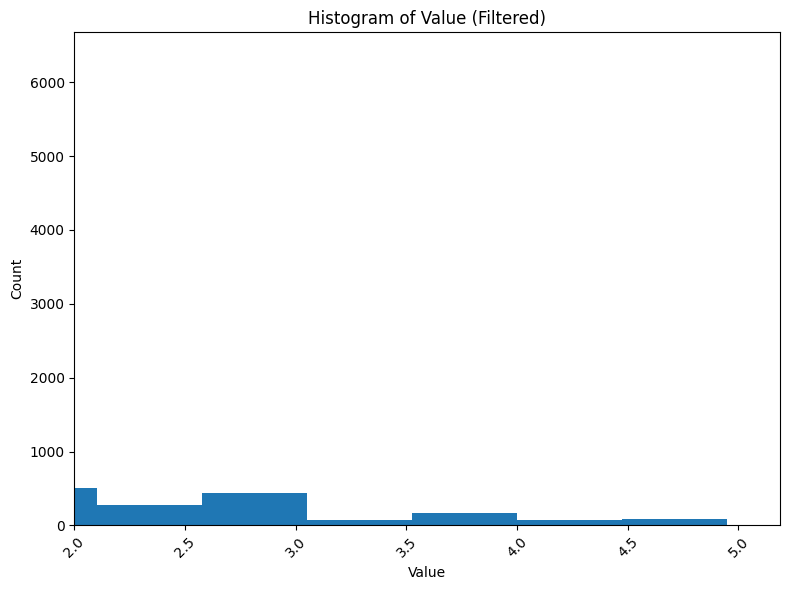

In [118]:
filtered_df = df.copy()
filtered_df = filtered_df[filtered_df['Value'] > 0.2]
filtered_df = filtered_df[filtered_df['Value'] < 5.0]

plt.figure(figsize=(8, 6))
plt.hist(filtered_df['Value'])
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Histogram of Value (Filtered)')
plt.xlim(left=2.0)  
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

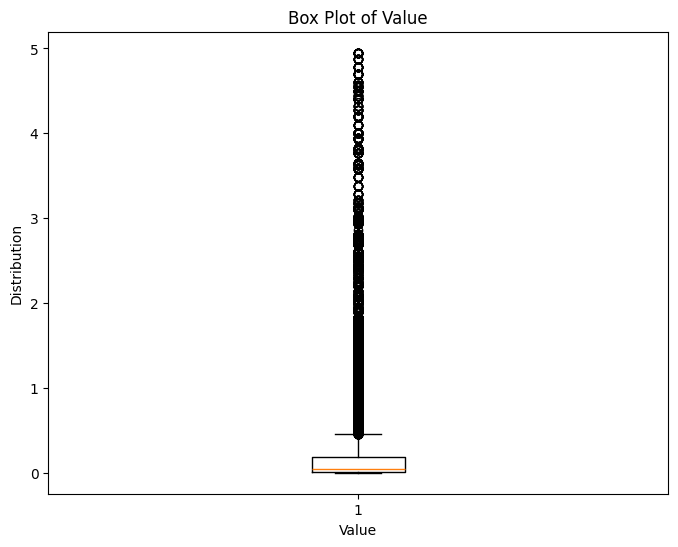

In [98]:
# Create a copy to avoid modifying the original df
filtered_df = df.copy()

# Filter for values under 5 (optional, comment out if not needed)
filtered_df = filtered_df[filtered_df['Value'] < 5]
filtered_df = filtered_df[filtered_df['Value'] > 0]

# Create the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_df['Value'])
plt.xlabel('Value')
plt.ylabel('Distribution')
plt.title('Box Plot of Value')
plt.show()


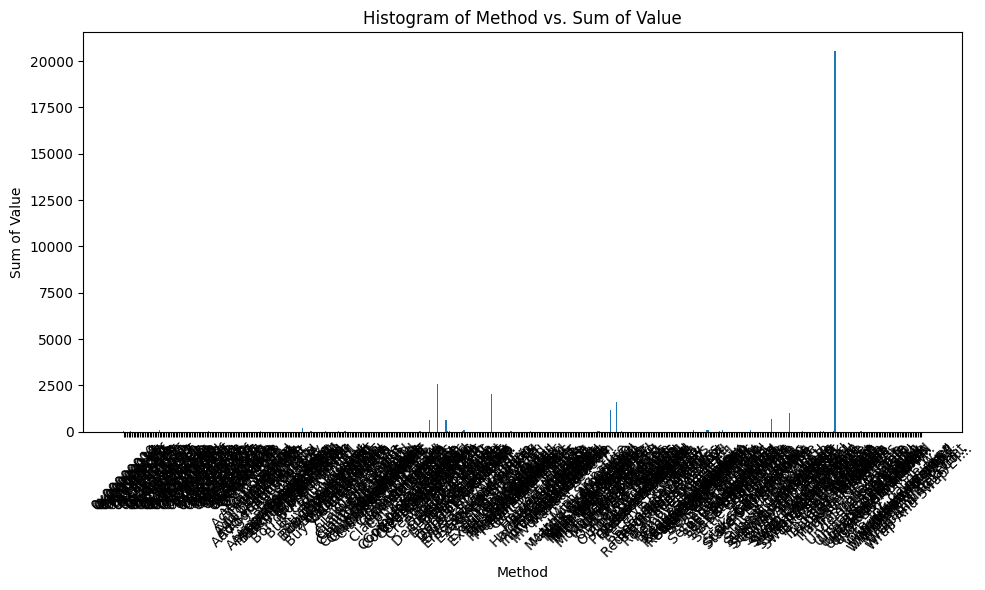

In [40]:
import matplotlib.pyplot as plt
age_groups = df.groupby('Method')['Value'].sum()  # Group by 'Age' and sum 'Value'

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(age_groups.index, age_groups.values)
plt.xlabel('Method')
plt.ylabel('Sum of Value')
plt.title('Histogram of Method vs. Sum of Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

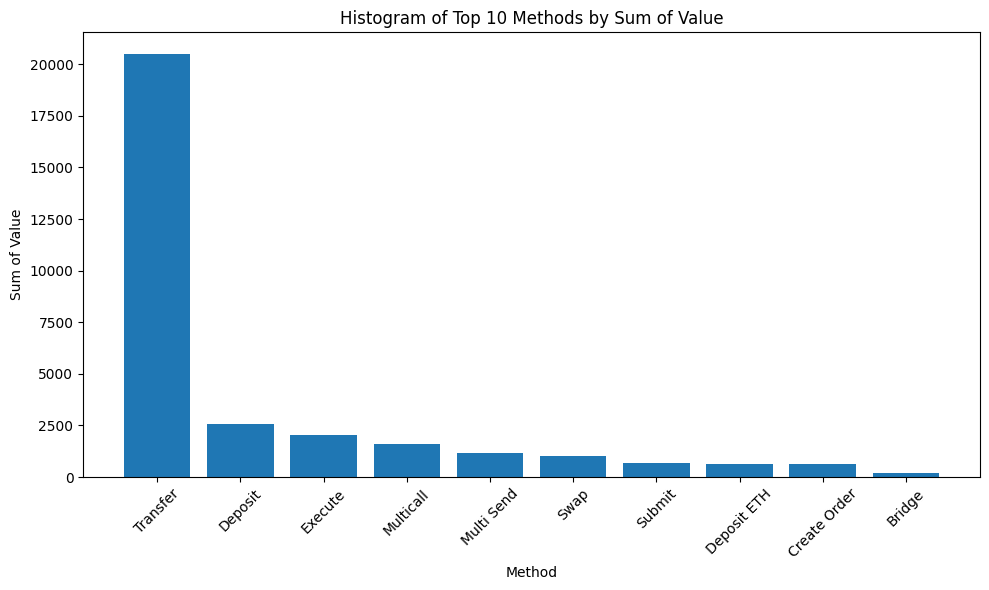

In [41]:
def plot_top_method_sums(df, num_bars=10):
  """
  Plots a histogram showing the sum of values for the top `num_bars` methods in 'df'.

  Args:
      df (pandas.DataFrame): The DataFrame containing the data.
      num_bars (int, optional): The number of bars to display in the histogram. Defaults to 10.
  """

  age_groups = df.groupby('Method')['Value'].sum()

  # Check if there are enough methods for the requested number of bars
  num_methods = len(age_groups)
  if num_methods < num_bars:
    num_bars = num_methods  # Adapt to the actual number of methods

  # Sort methods by sum of value (descending) and select the top `num_bars`
  top_methods = age_groups.sort_values(ascending=False).head(num_bars)

  plt.figure(figsize=(10, 6))
  plt.bar(top_methods.index, top_methods.values)
  plt.xlabel('Method')
  plt.ylabel('Sum of Value')
  plt.title(f'Histogram of Top {num_bars} Methods by Sum of Value')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

# Assuming your DataFrame is named 'df'
plot_top_method_sums(df.copy()) 

## SRS
using rand library and then Statistical Analysis, and calculate the mean and standard deviation of the samples and the population.

The mean of the SRS sample (0.3684) is slightly higher than the population mean (0.3294). This could be due to chance or the specific sample chosen not perfectly reflecting the population.

The standard deviation of the SRS sample (4.5788) is larger than the population standard deviation (3.6405). This is expected as samples typically have higher variability compared to the entire population they represent. The sample might include more extreme values than the population as a whole.

Overall, these results suggest that the SRS sample captures the general trend of the population but might deviate slightly in terms of average value and shows a bit more variation.

In [122]:
import random
sample_size = int(0.1 * len(df))
srs_sample = df.sample(sample_size, random_state=42) 
# Statistical Analysis
print("**Population Statistics**")
print(f"Mean (Population): {df['Value'].mean()}")
print(f"Standard Deviation (Population): {df['Value'].std()}")

print("\n**SRS Sample Statistics**")
print(f"Mean (SRS): {srs_sample['Value'].mean()}")
print(f"Standard Deviation (SRS): {srs_sample['Value'].std()}")

**Population Statistics**
Mean (Population): 0.32944276469946004
Standard Deviation (Population): 3.640530701494924

**SRS Sample Statistics**
Mean (SRS): 0.3684069348908
Standard Deviation (SRS): 4.5787615303741624


**Population Statistics**
Mean (Population): 0.32944276469946004
Standard Deviation (Population): 3.640530701494924

**SRS Sample Statistics**
Mean (SRS): 0.3684069348908
Standard Deviation (SRS): 4.5787615303741624


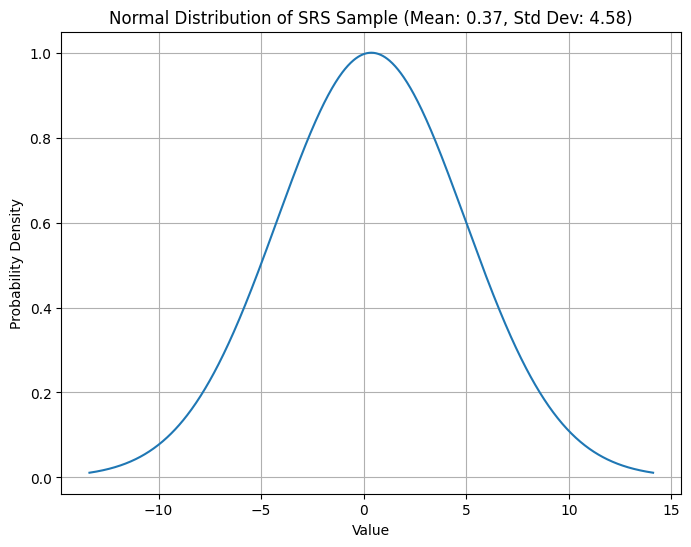


**SRS Sample Statistics**
Mean (SRS): 0.3684069348908
Standard Deviation (SRS): 4.5787615303741624


In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import NumPy for normal distribution

# Assuming you have your population DataFrame (df) and SRS sample (srs_sample)

# Print population statistics (unchanged)
print("**Population Statistics**")
print(f"Mean (Population): {df['Value'].mean()}")
print(f"Standard Deviation (Population): {df['Value'].std()}")

# Calculate parameters for normal distribution of SRS sample
sample_mean = srs_sample['Value'].mean()
sample_std = srs_sample['Value'].std()
print("\n**SRS Sample Statistics**")
print(f"Mean (SRS): {sample_mean}")
print(f"Standard Deviation (SRS): {sample_std}")

# Define x-axis values for the normal distribution (adjust range as needed)
x = np.linspace(sample_mean - 3 * sample_std, sample_mean + 3 * sample_std, 1000)

# Draw the normal distribution
plt.figure(figsize=(8, 6))
plt.plot(x, np.exp(-(x - sample_mean) ** 2 / (2 * sample_std**2)))
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of SRS Sample (Mean: {:.2f}, Std Dev: {:.2f})'.format(sample_mean, sample_std))
plt.grid(True)
plt.show()

# Print SRS sample statistics (unchanged)
print("\n**SRS Sample Statistics**")
print(f"Mean (SRS): {srs_sample['Value'].mean()}")
print(f"Standard Deviation (SRS): {srs_sample['Value'].std()}")


## Sampling
We chosed Sample size as 10% of population size, because if it gets too large, it violates independeny assumption and if it gets too small it weakens the normal distributions and preciseness. this is a trade of between accuracy and preciseness. also, we defined custom bin edges for finer control over bin ranges, becuse in some areas datas are dense. and not to mention we filtered for non-zero values (remove rows with 0.0 in 'Value')

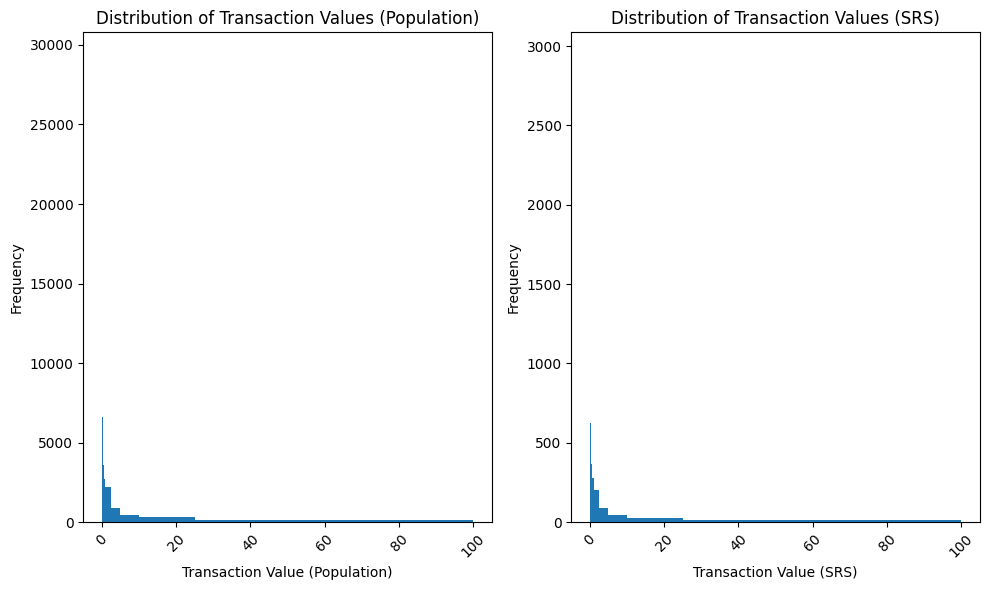

In [124]:
import random
import matplotlib.pyplot as plt


sample_size = int(0.1 * len(df))

srs_sample = df.sample(sample_size, random_state=42)


df_filtered = df[df['Value'] != 0]
srs_sample_filtered = srs_sample[srs_sample['Value'] != 0]

plt.figure(figsize=(10, 6))

# 
bins = [0, 0.1, 0.25, 0.5, 1, 2.5, 5, 10, 25, 50, 100] 

plt.subplot(1, 2, 1)
plt.hist(df_filtered['Value'], bins=bins)
plt.xlabel('Transaction Value (Population)')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Values (Population)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability with many bins

# Sample histogram
plt.subplot(1, 2, 2)
plt.hist(srs_sample_filtered['Value'], bins=bins)
plt.xlabel('Transaction Value (SRS)')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Values (SRS)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Down here, we have normalized histogram

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

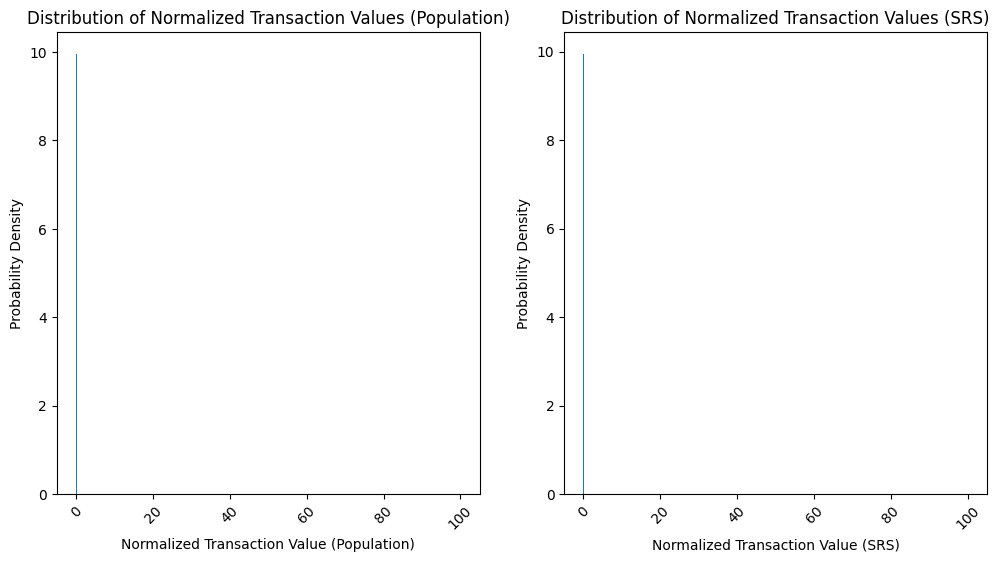

In [125]:
import random
import matplotlib.pyplot as plt


sample_size = int(0.1 * len(df))

# Simple Random Sampling (SRS)
srs_sample = df.sample(sample_size, random_state=42)


df_filtered = df[df['Value'] != 0]
srs_sample_filtered = srs_sample[srs_sample['Value'] != 0]


df_filtered_normalized = df_filtered['Value'] / df_filtered['Value'].max()
srs_sample_filtered_normalized = srs_sample_filtered['Value'] / srs_sample_filtered['Value'].max()

bins = [0, 0.1, 0.25, 0.5, 1, 1.25, 1.5, 1.75, 2, 2.5, 5, 10, 25, 50, 100]

plt.figure(figsize=(12, 6)) 

plt.subplot(1, 2, 1)
plt.hist(df_filtered_normalized, bins=bins, density=True)  
plt.xlabel('Normalized Transaction Value (Population)')
plt.ylabel('Probability Density')
plt.title('Distribution of Normalized Transaction Values (Population)')
plt.xticks(rotation=45)  

plt.subplot(1, 2, 2)
plt.hist(srs_sample_filtered_normalized, bins=bins, density=True) 
plt.xlabel('Normalized Transaction Value (SRS)')
plt.ylabel('Probability Density')
plt.title('Distribution of Normalized Transaction Values (SRS)')
plt.xticks(rotation=45)


**Population Histogram (Integer Bars):**
Bin 0.0-0.1 Probability: 0.9951
Bin 1.0-1.25 Probability: 0.0001
Bin 2.0-2.5 Probability: 0.0000
Bin 5.0-10.0 Probability: 0.0000
Bin 10.0-25.0 Probability: 0.0000
Bin 25.0-50.0 Probability: 0.0000
Bin 50.0-100.0 Probability: 0.0000

**SRS Sample Histogram (Integer Bars):**
Bin 0.0-0.1 Probability: 0.9941
Bin 1.0-1.25 Probability: 0.0002
Bin 2.0-2.5 Probability: 0.0000
Bin 5.0-10.0 Probability: 0.0000
Bin 10.0-25.0 Probability: 0.0000
Bin 25.0-50.0 Probability: 0.0000
Bin 50.0-100.0 Probability: 0.0000


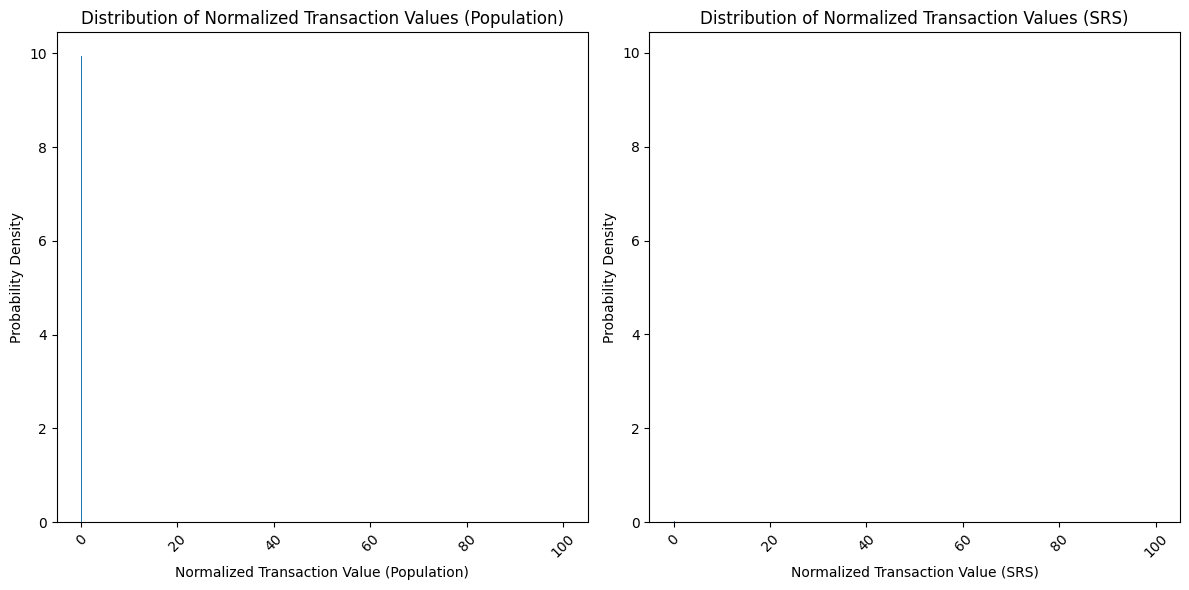

In [126]:
import random
import matplotlib.pyplot as plt
import numpy as np  
sample_size = int(0.1 * len(df))

srs_sample = df.sample(sample_size, random_state=42)


df_filtered = df[df['Value'] != 0]
srs_sample_filtered = srs_sample[srs_sample['Value'] != 0]

df_filtered_normalized = df_filtered['Value'] / df_filtered['Value'].max()
srs_sample_filtered_normalized = srs_sample_filtered['Value'] / srs_sample_filtered['Value'].max()

bins = [0, 0.1, 0.25, 0.5, 1, 1.25, 1.5, 1.75, 2, 2.5, 5, 10, 25, 50, 100]

plt.figure(figsize=(12, 6))  

plt.subplot(1, 2, 1)
plt.hist(df_filtered_normalized, bins=bins, density=True)  
plt.xlabel('Normalized Transaction Value (Population)')
plt.ylabel('Probability Density')
plt.title('Distribution of Normalized Transaction Values (Population)')
plt.xticks(rotation=45)  

# Sample histogram
plt.subplot(1, 2, 2)
plt.hist(srs_sample_filtered_normalized, bins=bins, density=True) 
plt.xlabel('Normalized Transaction Value (SRS)')
plt.ylabel('Probability Density')
plt.title('Distribution of Normalized Transaction Values (SRS)')
plt.xticks(rotation=45)

pop_counts, pop_bins = np.histogram(df_filtered_normalized, bins=bins)
pop_probabilities = pop_counts / np.sum(pop_counts)  

sample_counts, sample_bins = np.histogram(srs_sample_filtered_normalized, bins=bins)
sample_probabilities = sample_counts / np.sum(sample_counts)

# Print probabilities for integer bars
print("**Population Histogram (Integer Bars):**")
for i in range(len(pop_bins) - 1):
    if pop_bins[i] == int(pop_bins[i]):  
        print(f"Bin {pop_bins[i]}-{pop_bins[i+1]} Probability: {pop_probabilities[i]:.4f}")

print("\n**SRS Sample Histogram (Integer Bars):**")
for i in range(len(sample_bins) - 1):
    if sample_bins[i] == int(sample_bins[i]):  
        print(f"Bin {sample_bins[i]}-{sample_bins[i+1]} Probability: {sample_probabilities[i]:.4f}")

plt.tight_layout()
plt.show()


In [52]:
!pip install scipy


     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------- ------------------- 30.7/60.4 kB 77.0 kB/s eta 0:00:01
     ------------------- ------------------- 30.7/60.4 kB 77.0 kB/s eta 0:00:01
     ------------------- ------------------- 30.7/60.4 kB 77.0 kB/s eta 0:00:01
     -------------------------- ------------ 41.0/60.4 kB 72.8 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 107.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/46.2 MB 2.0 MB/s eta 0:00:23
   -------------

**Population Histogram (All Bars):**
Bin 0.0-0.01 Probability: 0.9633
Bin 0.01-0.02 Probability: 0.0192
Bin 0.02-0.03 Probability: 0.0039
Bin 0.03-0.04 Probability: 0.0038
Bin 0.04-0.05 Probability: 0.0011
Bin 0.05-0.06 Probability: 0.0012
Bin 0.06-0.07 Probability: 0.0006
Bin 0.07-0.08 Probability: 0.0012
Bin 0.08-0.09 Probability: 0.0003
Bin 0.09-0.1 Probability: 0.0004
Bin 0.1-0.25 Probability: 0.0034
Bin 0.25-0.5 Probability: 0.0014
Bin 0.5-1.0 Probability: 0.0000
Bin 1.0-2.5 Probability: 0.0001
Bin 2.5-5.0 Probability: 0.0000
Bin 5.0-10.0 Probability: 0.0000
Bin 10.0-25.0 Probability: 0.0000
Bin 25.0-50.0 Probability: 0.0000
Bin 50.0-100.0 Probability: 0.0000

**SRS Sample Histogram (All Bars):**
Bin 0.0-0.01 Probability: 0.9624
Bin 0.01-0.02 Probability: 0.0192
Bin 0.02-0.03 Probability: 0.0044
Bin 0.03-0.04 Probability: 0.0037
Bin 0.04-0.05 Probability: 0.0015
Bin 0.05-0.06 Probability: 0.0007
Bin 0.06-0.07 Probability: 0.0004
Bin 0.07-0.08 Probability: 0.0011
Bin 0.08-0.09 Prob

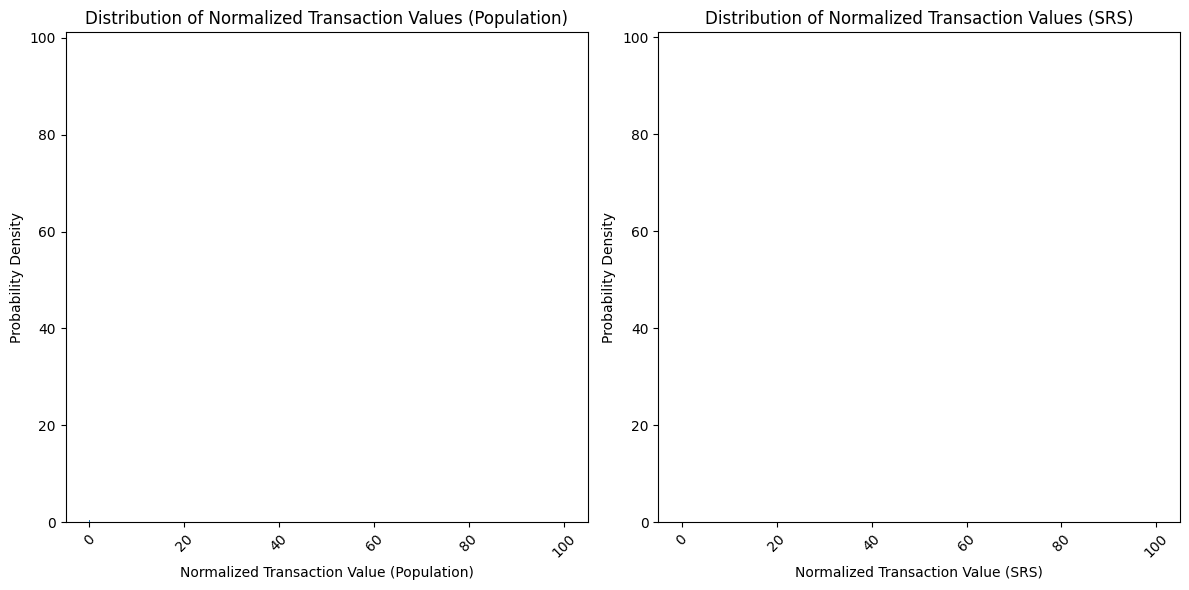

In [127]:
import random
import matplotlib.pyplot as plt
import numpy as np  
sample_size = int(0.1 * len(df))

# Simple Random Sampling (SRS)
srs_sample = df.sample(sample_size, random_state=42)


df_filtered = df[df['Value'] != 0]
srs_sample_filtered = srs_sample[srs_sample['Value'] != 0]

df_filtered_normalized = df_filtered['Value'] / df_filtered['Value'].max()
srs_sample_filtered_normalized = srs_sample_filtered['Value'] / srs_sample_filtered['Value'].max()


bins = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
bins.extend([0.25, 0.5, 1, 2.5, 5, 10, 25, 50, 100])  

plt.figure(figsize=(12, 6)) 


plt.subplot(1, 2, 1)
plt.hist(df_filtered_normalized, bins=bins, density=True)  
plt.xlabel('Normalized Transaction Value (Population)')
plt.ylabel('Probability Density')
plt.title('Distribution of Normalized Transaction Values (Population)')
plt.xticks(rotation=45)  


plt.subplot(1, 2, 2)
plt.hist(srs_sample_filtered_normalized, bins=bins, density=True)  
plt.xlabel('Normalized Transaction Value (SRS)')
plt.ylabel('Probability Density')
plt.title('Distribution of Normalized Transaction Values (SRS)')
plt.xticks(rotation=45)


pop_counts, pop_bins = np.histogram(df_filtered_normalized, bins=bins)
pop_probabilities = pop_counts / np.sum(pop_counts) 

sample_counts, sample_bins = np.histogram(srs_sample_filtered_normalized, bins=bins)
sample_probabilities = sample_counts / np.sum(sample_counts)


print("**Population Histogram (All Bars):**")
for i in range(len(pop_bins) - 1):
    print(f"Bin {pop_bins[i]}-{pop_bins[i+1]} Probability: {pop_probabilities[i]:.4f}")

print("\n**SRS Sample Histogram (All Bars):**")
for i in range(len(sample_bins) - 1):
    print(f"Bin {sample_bins[i]}-{sample_bins[i+1]} Probability: {sample_probabilities[i]:.4f}")

plt.tight_layout()
plt.show()


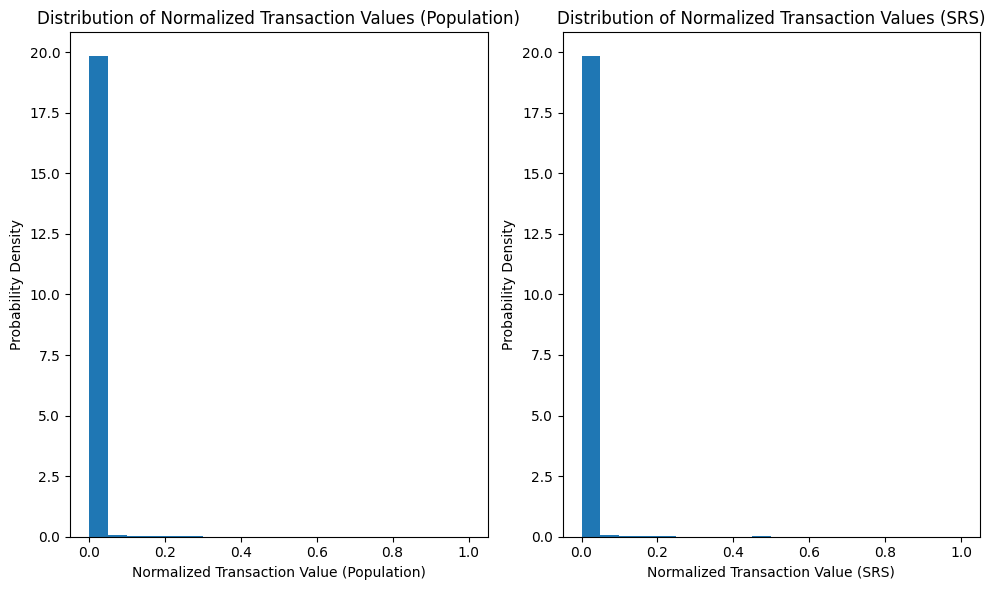

In [53]:
import random
import matplotlib.pyplot as plt

# Sample size (10% of population)
sample_size = int(0.1 * len(df))

# Simple Random Sampling (SRS)
srs_sample = df.sample(sample_size, random_state=42)

# Filter for non-zero values (remove rows with 0.0 in 'Value')
df_filtered = df[df['Value'] != 0]
srs_sample_filtered = srs_sample[srs_sample['Value'] != 0]

# Statistical Analysis (optional, comment out if not needed)
# print("**Population Statistics**")
# print(f"Mean (Population): {df_filtered['Value'].mean()}")
# print(f"Standard Deviation (Population): {df_filtered['Value'].std()}")

# print("\n**SRS Sample Statistics**")
# print(f"Mean (SRS): {srs_sample_filtered['Value'].mean()}")
# print(f"Standard Deviation (SRS): {srs_sample_filtered['Value'].std()}")

# Normalize data (values between 0 and 1)
df_filtered_normalized = df_filtered['Value'] / df_filtered['Value'].max()
srs_sample_filtered_normalized = srs_sample_filtered['Value'] / srs_sample_filtered['Value'].max()

# Histograms for value distribution (without zeros and normalized)
plt.figure(figsize=(10, 6))

# Population histogram
plt.subplot(1, 2, 1)
plt.hist(df_filtered_normalized, bins=20, density=True)  # Adjust bins as needed
plt.xlabel('Normalized Transaction Value (Population)')
plt.ylabel('Probability Density')
plt.title('Distribution of Normalized Transaction Values (Population)')

# Sample histogram
plt.subplot(1, 2, 2)
plt.hist(srs_sample_filtered_normalized, bins=20, density=True)  # Adjust bins as needed
plt.xlabel('Normalized Transaction Value (SRS)')
plt.ylabel('Probability Density')
plt.title('Distribution of Normalized Transaction Values (SRS)')

plt.tight_layout()
plt.show()


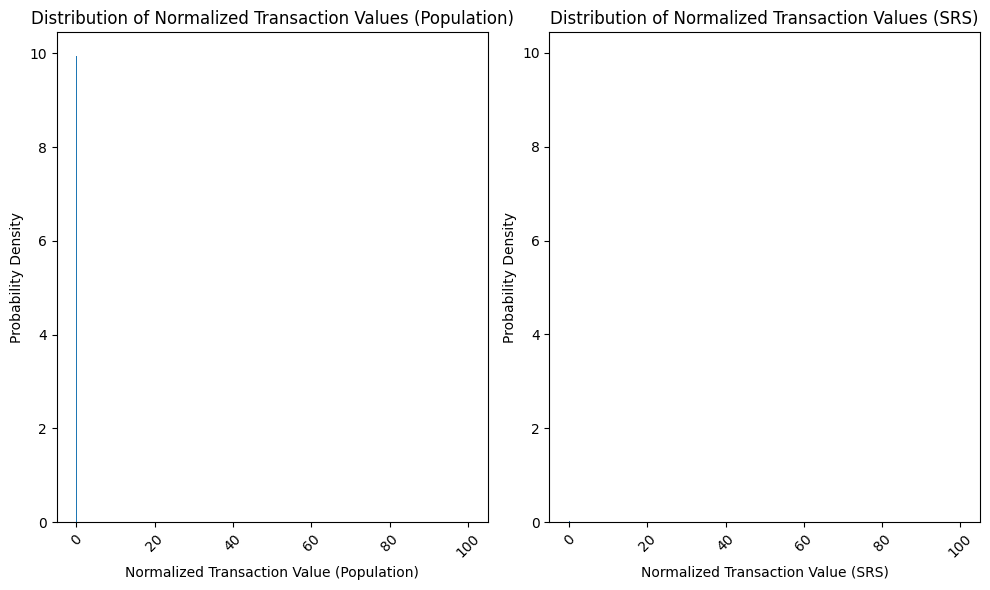

In [55]:
import random
import matplotlib.pyplot as plt

# Sample size (10% of population)
sample_size = int(0.1 * len(df))

# Simple Random Sampling (SRS)
srs_sample = df.sample(sample_size, random_state=42)

# Filter for non-zero values (remove rows with 0.0 in 'Value')
df_filtered = df[df['Value'] != 0]
srs_sample_filtered = srs_sample[srs_sample['Value'] != 0]

# Statistical Analysis (optional, comment out if not needed)
# print("**Population Statistics**")
# print(f"Mean (Population): {df_filtered['Value'].mean()}")
# print(f"Standard Deviation (Population): {df_filtered['Value'].std()}")

# print("\n**SRS Sample Statistics**")
# print(f"Mean (SRS): {srs_sample_filtered['Value'].mean()}")
# print(f"Standard Deviation (SRS): {srs_sample_filtered['Value'].std()}")

# Normalize data (values between 0 and 1)
df_filtered_normalized = df_filtered['Value'] / df_filtered['Value'].max()
srs_sample_filtered_normalized = srs_sample_filtered['Value'] / srs_sample_filtered['Value'].max()

# Define custom bin edges for finer control over bin ranges
bins = [0, 0.1, 0.25, 0.5, 1, 2.5, 5, 10, 25, 50, 100]  # Adjust bin ranges as needed

# Histograms for value distribution (without zeros and normalized)
plt.figure(figsize=(10, 6))

# Population histogram
plt.subplot(1, 2, 1)
plt.hist(df_filtered_normalized, bins=bins, density=True)  # Adjust bins as needed
plt.xlabel('Normalized Transaction Value (Population)')
plt.ylabel('Probability Density')
plt.title('Distribution of Normalized Transaction Values (Population)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Sample histogram
plt.subplot(1, 2, 2)
plt.hist(srs_sample_filtered_normalized, bins=bins, density=True)  # Adjust bins as needed
plt.xlabel('Normalized Transaction Value (SRS)')
plt.ylabel('Probability Density')
plt.title('Distribution of Normalized Transaction Values (SRS)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Why We Used Stratified Sampling Based on Blocks?

In our project, we employed stratified sampling with "blocks" as the stratification factor for several reasons:

### Distribution and Dependency of Transactions on each block:  

The population we were analyzing likely contained subgroups (strata) with distinct characteristics related to the variable of interest ("Value" in your case). Blocks likely represent these subgroups. Stratified sampling ensures that each block (subgroup) is proportionally represented in the final sample. This helps us avoid a sample that might be skewed towards one block or another, leading to a less accurate representation of the entire population.

In [128]:
min_sample_size = 1

# Stratified Sampling with minimum sample size
stratified_sample = df.groupby('Block').apply(lambda x: x.sample(frac=0.1, random_state=42))

# Print sample size information (optional)
print("Sample size per block:")
print(stratified_sample['Block'].value_counts(normalize=True))
print("Main size per block:")
print(df['Block'].value_counts(normalize=True))

# Statistical Analysis
print("**Population Statistics**")
print(f"Mean (Population): {df['Value'].mean()}")
print(f"Standard Deviation (Population): {df['Value'].std()}")

print("\n**Stratified Sample Statistics**")
print(f"Mean (Stratified): {stratified_sample['Value'].mean()}")
print(f"Standard Deviation (Stratified): {stratified_sample['Value'].std()}")


Sample size per block:
Block
19397046    0.0085
19397121    0.0075
19397270    0.0065
19397123    0.0065
19397214    0.0065
             ...  
19397037    0.0005
19397058    0.0005
19397039    0.0005
19397054    0.0005
19397031    0.0005
Name: proportion, Length: 264, dtype: float64
Main size per block:
Block
19397046    0.0085
19397121    0.0075
19397270    0.0065
19397123    0.0065
19397214    0.0065
             ...  
19397037    0.0005
19397058    0.0005
19397039    0.0005
19397054    0.0005
19397031    0.0005
Name: proportion, Length: 264, dtype: float64
**Population Statistics**
Mean (Population): 0.32944276469946004
Standard Deviation (Population): 3.640530701494924

**Stratified Sample Statistics**
Mean (Stratified): 0.3021373838411
Standard Deviation (Stratified): 2.914403411686101


C:\Users\USER\AppData\Local\Temp\ipykernel_14516\4123315832.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = df.groupby('Block').apply(lambda x: x.sample(frac=0.1, random_state=42))


## Result:

The point estimations of population, random sample and stratified sample almost are the same. so we conclude that Transaction's values are independent of the blocks they are in.

C:\Users\USER\AppData\Local\Temp\ipykernel_14516\1037904433.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = df.groupby('Block').apply(stratified_sample_with_min_size)


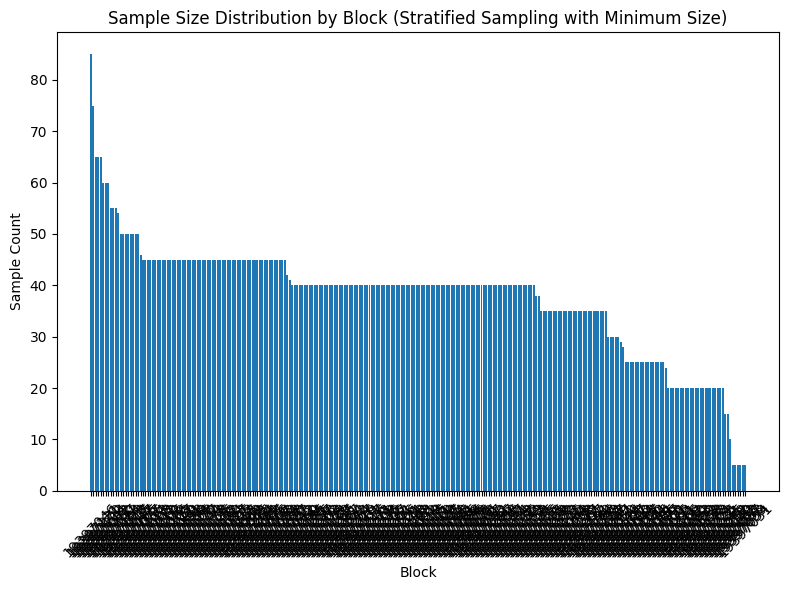

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Minimum sample size per block
min_sample_size = 1

# Stratified Sampling with minimum sample size
def stratified_sample_with_min_size(group):
    """Samples a proportional number of rows from each block with minimum size.

    Args:
        group (pandas.DataFrame): A DataFrame group from 'Block'.

    Returns:
        pandas.DataFrame: The sampled DataFrame.
    """

    return group.sample(max(min_sample_size, int(0.1 * len(group))), random_state=42)

stratified_sample = df.groupby('Block').apply(stratified_sample_with_min_size)

# Get block counts for the histogram
block_counts = stratified_sample['Block'].value_counts()

# Create the histogram
plt.figure(figsize=(8, 6))
plt.bar(block_counts.index, block_counts.values)
plt.xlabel('Block')
plt.ylabel('Sample Count')
plt.title('Sample Size Distribution by Block (Stratified Sampling with Minimum Size)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


## References

https://www.geeksforgeeks.org/stratified-sampling-in-pandas/

https://scales.arabpsychology.com/stats/how-to-perform-stratified-sampling-in-pandas-with-examples/

https://towardsdatascience.com/how-to-use-selenium-to-web-scrape-with-example-80f9b23a843a

https://www.atlassian.com/data/charts/violin-plot-complete-guide